In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries**

In [84]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)

**Loading Data**

In [85]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_CNN/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_CNN/test.csv')

In [86]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Preprocessing**

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [90]:
train.shape

(42000, 785)

In [91]:
test.shape

(28000, 784)

In [92]:
X_train = train.drop(labels = ['label'], axis = 1)

Y_train = train['label']

In [93]:
# Normalize pixel values
X_train = X_train / 255.0
test = test / 255.0

In [94]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print('Data after reshaping', X_train.shape)
print('Data after reshaping', test.shape)


Data after reshaping (42000, 28, 28, 1)
Data after reshaping (28000, 28, 28, 1)


In [95]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, 10)

**Splitting data into trainig and test**

In [96]:
#Train-test-split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')


**Applying CNN model**

In [98]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [99]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [100]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

**Model Training**

In [103]:
history = model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20,
          batch_size=64,
          callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.8082 - loss: 0.6065 - val_accuracy: 0.9726 - val_loss: 0.0817 - learning_rate: 0.0010
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9708 - loss: 0.0985 - val_accuracy: 0.9845 - val_loss: 0.0484 - learning_rate: 0.0010
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9783 - loss: 0.0717 - val_accuracy: 0.9869 - val_loss: 0.0419 - learning_rate: 0.0010
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9836 - loss: 0.0556 - val_accuracy: 0.9874 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9860 - loss: 0.0436 - val_accuracy: 0.9881 - val_loss: 0.0356 - learning_rate: 0.0010
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9880 - loss: 0.0393 - val_accuracy: 0.9902 - val_loss: 0.0391 - learning_rate: 0.0010
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9883 - l

In [104]:
#Model evolution
test_loss, test_accuracy = model.evaluate(X_val, Y_val, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.10%


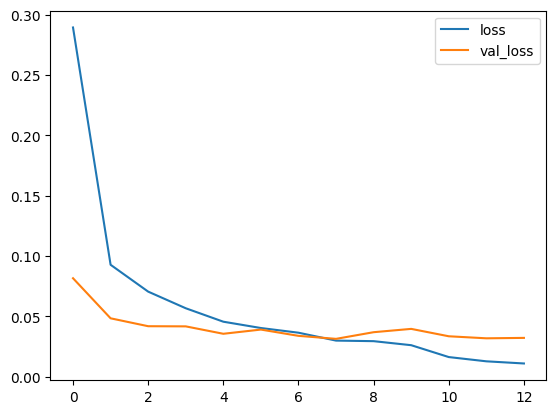

In [110]:
# loss vs val_loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

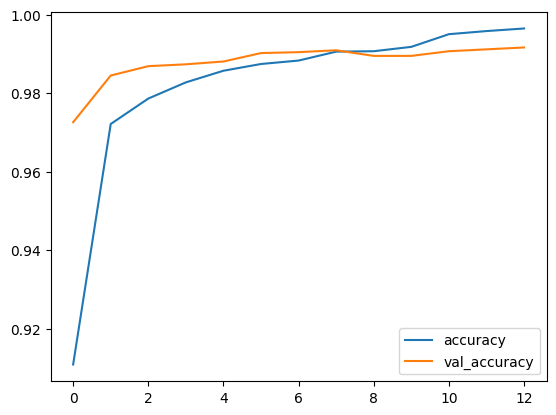

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,)

datagen.fit(X_train)

In [108]:
#Model Training with Data Augmentation

History = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
          validation_data=(X_val, Y_val),
          epochs=20,
          callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.9042 - loss: 0.3405 - val_accuracy: 0.9919 - val_loss: 0.0277 - learning_rate: 4.0000e-05
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.9289 - loss: 0.2378 - val_accuracy: 0.9919 - val_loss: 0.0279 - learning_rate: 4.0000e-05
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9386 - loss: 0.2005 - val_accuracy: 0.9917 - val_loss: 0.0279 - learning_rate: 4.0000e-05
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.9420 - loss: 0.1892 - val_accuracy: 0.9914 - val_loss: 0.0281 - learning_rate: 1.0000e-05
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9391 - loss: 0.1989 - val_accuracy: 0.9914 - val_loss: 0.0281 - learning_rate: 1.0000e-05
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9428 - loss: 0.1940 - val_accuracy: 0.9914 - val_loss: 0.0282 - learning_rate: 1.0000e-05


In [109]:
test_loss, test_accuracy = model.evaluate(X_val, Y_val, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.19%
